<a href="https://colab.research.google.com/github/chendhurarasu/AQI_prediction/blob/main/AQI_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

weather_df  = pd.read_csv('modified_pune_2019_2022.csv')

weather_df.head()

,date_time,maxtempC,mintempC,totalSnow_cm,sunHour,uvIndex,moon_illumination,DewPointC,FeelsLikeC,HeatIndexC,WindChillC,WindGustKmph,cloudcover,humidity,precipMM,pressure,tempC,visibility,winddirDegree,windspeedKmph
0,2019-01-01,29.0,14.0,0.0,11.0,6.0,26.0,1.375000,21.083333,21.166667,21.625000,13.791667,7.416667,24.791667,0.0,1018.458333,21.666667,10.0,107.000000,7.708333
1,2019-01-02,31.0,18.0,0.0,11.0,6.0,19.0,1.625000,23.000000,23.041667,23.708333,10.500000,0.000000,22.416667,0.0,1018.000000,23.708333,10.0,109.708333,6.291667
2,2019-01-03,32.0,19.0,0.0,11.0,6.0,11.0,4.083333,23.791667,24.083333,24.541667,9.250000,0.000000,25.250000,0.0,1018.166667,24.541667,10.0,138.208333,4.583333
3,2019-01-04,32.0,19.0,0.0,11.0,6.0,4.0,5.041667,24.000000,24.208333,24.500000,10.750000,0.000000,27.291667,0.0,1016.916667,24.500000,10.0,130.916667,6.833333
4,2019-01-05,31.0,19.0,0.0,11.0,6.0,0.0,7.750000,24.208333,24.541667,24.583333,12.500000,0.541667,33.750000,0.0,1015.458333,24.583333,10.0,262.791667,7.083333


In [2]:
AQI_df = pd.read_csv('sorted_modified_file.csv')
AQI_df.head()

,Date,SO2 µg/m3,Nox µg/m3,RSPM µg/m3,SPM,CO2 µg/m3,AQI,Location
0,2019-01-01 00:00:00,33,68,255.0,348.0,NaN,205.0,MPCB-BSRI
1,2019-01-01 00:00:00,56,52,172.0,NaN,NaN,148.0,MPCB-PMPR
2,2019-01-01 00:00:00,31,78,163.0,362.0,NaN,142.0,MPCB-SWGT
3,2019-01-01 00:00:00,15,84,203.0,NaN,NaN,169.0,MPCB-KR
4,2019-01-02 00:00:00,18,38,125.0,NaN,NaN,117.0,MPCB-KR


In [3]:
AQI_df['Date'] = pd.to_datetime(AQI_df['Date']).dt.date
AQI_df['Date'] = AQI_df['Date'].astype(str)
AQI_df.head()

,Date,SO2 µg/m3,Nox µg/m3,RSPM µg/m3,SPM,CO2 µg/m3,AQI,Location
0,2019-01-01,33,68,255.0,348.0,NaN,205.0,MPCB-BSRI
1,2019-01-01,56,52,172.0,NaN,NaN,148.0,MPCB-PMPR
2,2019-01-01,31,78,163.0,362.0,NaN,142.0,MPCB-SWGT
3,2019-01-01,15,84,203.0,NaN,NaN,169.0,MPCB-KR
4,2019-01-02,18,38,125.0,NaN,NaN,117.0,MPCB-KR


In [4]:
sorted_AQI = AQI_df.sort_values(by='Date')
sorted_AQI.head()

,Date,SO2 µg/m3,Nox µg/m3,RSPM µg/m3,SPM,CO2 µg/m3,AQI,Location
0,2019-01-01,33,68,255.0,348.0,NaN,205.0,MPCB-BSRI
1,2019-01-01,56,52,172.0,NaN,NaN,148.0,MPCB-PMPR
2,2019-01-01,31,78,163.0,362.0,NaN,142.0,MPCB-SWGT
3,2019-01-01,15,84,203.0,NaN,NaN,169.0,MPCB-KR
4,2019-01-02,18,38,125.0,NaN,NaN,117.0,MPCB-KR


In [5]:
sorted_weather = weather_df.sort_values(by='date_time')
sorted_weather.head()

,date_time,maxtempC,mintempC,totalSnow_cm,sunHour,uvIndex,moon_illumination,DewPointC,FeelsLikeC,HeatIndexC,WindChillC,WindGustKmph,cloudcover,humidity,precipMM,pressure,tempC,visibility,winddirDegree,windspeedKmph
0,2019-01-01,29.0,14.0,0.0,11.0,6.0,26.0,1.375000,21.083333,21.166667,21.625000,13.791667,7.416667,24.791667,0.0,1018.458333,21.666667,10.0,107.000000,7.708333
1,2019-01-02,31.0,18.0,0.0,11.0,6.0,19.0,1.625000,23.000000,23.041667,23.708333,10.500000,0.000000,22.416667,0.0,1018.000000,23.708333,10.0,109.708333,6.291667
2,2019-01-03,32.0,19.0,0.0,11.0,6.0,11.0,4.083333,23.791667,24.083333,24.541667,9.250000,0.000000,25.250000,0.0,1018.166667,24.541667,10.0,138.208333,4.583333
3,2019-01-04,32.0,19.0,0.0,11.0,6.0,4.0,5.041667,24.000000,24.208333,24.500000,10.750000,0.000000,27.291667,0.0,1016.916667,24.500000,10.0,130.916667,6.833333
4,2019-01-05,31.0,19.0,0.0,11.0,6.0,0.0,7.750000,24.208333,24.541667,24.583333,12.500000,0.541667,33.750000,0.0,1015.458333,24.583333,10.0,262.791667,7.083333


In [6]:
sorted_weather.describe()
sorted_AQI.describe()

,SO2 µg/m3,Nox µg/m3,RSPM µg/m3,SPM,CO2 µg/m3,AQI
count,181.000000,181.000000,181.000000,50.000000,0.0,181.000000
mean,28.585635,73.541436,141.475138,406.040000,NaN,136.602210
std,17.621944,40.172471,49.000178,117.961246,NaN,32.379808
min,4.000000,9.000000,45.000000,189.000000,NaN,78.000000
25%,13.000000,35.000000,109.000000,320.500000,NaN,117.000000
50%,29.000000,75.000000,134.000000,389.500000,NaN,129.000000
75%,38.000000,100.000000,167.000000,498.000000,NaN,153.000000
max,93.000000,178.000000,331.000000,640.000000,NaN,281.000000


In [7]:
merged_df = pd.merge(sorted_weather,sorted_AQI,left_on='date_time',right_on='Date',how='inner')
merged_df.head()

,date_time,maxtempC,mintempC,totalSnow_cm,sunHour,uvIndex,moon_illumination,DewPointC,FeelsLikeC,HeatIndexC,...,winddirDegree,windspeedKmph,Date,SO2 µg/m3,Nox µg/m3,RSPM µg/m3,SPM,CO2 µg/m3,AQI,Location
0,2019-01-01,29.0,14.0,0.0,11.0,6.0,26.0,1.375,21.083333,21.166667,...,107.000000,7.708333,2019-01-01,33,68,255.0,348.0,NaN,205.0,MPCB-BSRI
1,2019-01-01,29.0,14.0,0.0,11.0,6.0,26.0,1.375,21.083333,21.166667,...,107.000000,7.708333,2019-01-01,56,52,172.0,NaN,NaN,148.0,MPCB-PMPR
2,2019-01-01,29.0,14.0,0.0,11.0,6.0,26.0,1.375,21.083333,21.166667,...,107.000000,7.708333,2019-01-01,31,78,163.0,362.0,NaN,142.0,MPCB-SWGT
3,2019-01-01,29.0,14.0,0.0,11.0,6.0,26.0,1.375,21.083333,21.166667,...,107.000000,7.708333,2019-01-01,15,84,203.0,NaN,NaN,169.0,MPCB-KR
4,2019-01-02,31.0,18.0,0.0,11.0,6.0,19.0,1.625,23.000000,23.041667,...,109.708333,6.291667,2019-01-02,18,38,125.0,NaN,NaN,117.0,MPCB-KR


In [8]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181 entries, 0 to 180
Data columns (total 28 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   date_time          181 non-null    object 
 1   maxtempC           181 non-null    float64
 2   mintempC           181 non-null    float64
 3   totalSnow_cm       181 non-null    float64
 4   sunHour            181 non-null    float64
 5   uvIndex            181 non-null    float64
 6   moon_illumination  181 non-null    float64
 7   DewPointC          181 non-null    float64
 8   FeelsLikeC         181 non-null    float64
 9   HeatIndexC         181 non-null    float64
 10  WindChillC         181 non-null    float64
 11  WindGustKmph       181 non-null    float64
 12  cloudcover         181 non-null    float64
 13  humidity           181 non-null    float64
 14  precipMM           181 non-null    float64
 15  pressure           181 non-null    float64
 16  tempC              181 non

In [9]:
data = data = merged_df.drop(columns=['Date', 'CO2 µg/m3'])
data.head()

,date_time,maxtempC,mintempC,totalSnow_cm,sunHour,uvIndex,moon_illumination,DewPointC,FeelsLikeC,HeatIndexC,...,tempC,visibility,winddirDegree,windspeedKmph,SO2 µg/m3,Nox µg/m3,RSPM µg/m3,SPM,AQI,Location
0,2019-01-01,29.0,14.0,0.0,11.0,6.0,26.0,1.375,21.083333,21.166667,...,21.666667,10.0,107.000000,7.708333,33,68,255.0,348.0,205.0,MPCB-BSRI
1,2019-01-01,29.0,14.0,0.0,11.0,6.0,26.0,1.375,21.083333,21.166667,...,21.666667,10.0,107.000000,7.708333,56,52,172.0,NaN,148.0,MPCB-PMPR
2,2019-01-01,29.0,14.0,0.0,11.0,6.0,26.0,1.375,21.083333,21.166667,...,21.666667,10.0,107.000000,7.708333,31,78,163.0,362.0,142.0,MPCB-SWGT
3,2019-01-01,29.0,14.0,0.0,11.0,6.0,26.0,1.375,21.083333,21.166667,...,21.666667,10.0,107.000000,7.708333,15,84,203.0,NaN,169.0,MPCB-KR
4,2019-01-02,31.0,18.0,0.0,11.0,6.0,19.0,1.625,23.000000,23.041667,...,23.708333,10.0,109.708333,6.291667,18,38,125.0,NaN,117.0,MPCB-KR


In [10]:
data['date_time'] = pd.to_datetime(data['date_time'])

In [11]:
data['SPM'] = data['SPM'].fillna(data['SPM'].mean())
data.head()

,date_time,maxtempC,mintempC,totalSnow_cm,sunHour,uvIndex,moon_illumination,DewPointC,FeelsLikeC,HeatIndexC,...,tempC,visibility,winddirDegree,windspeedKmph,SO2 µg/m3,Nox µg/m3,RSPM µg/m3,SPM,AQI,Location
0,2019-01-01,29.0,14.0,0.0,11.0,6.0,26.0,1.375,21.083333,21.166667,...,21.666667,10.0,107.000000,7.708333,33,68,255.0,348.00,205.0,MPCB-BSRI
1,2019-01-01,29.0,14.0,0.0,11.0,6.0,26.0,1.375,21.083333,21.166667,...,21.666667,10.0,107.000000,7.708333,56,52,172.0,406.04,148.0,MPCB-PMPR
2,2019-01-01,29.0,14.0,0.0,11.0,6.0,26.0,1.375,21.083333,21.166667,...,21.666667,10.0,107.000000,7.708333,31,78,163.0,362.00,142.0,MPCB-SWGT
3,2019-01-01,29.0,14.0,0.0,11.0,6.0,26.0,1.375,21.083333,21.166667,...,21.666667,10.0,107.000000,7.708333,15,84,203.0,406.04,169.0,MPCB-KR
4,2019-01-02,31.0,18.0,0.0,11.0,6.0,19.0,1.625,23.000000,23.041667,...,23.708333,10.0,109.708333,6.291667,18,38,125.0,406.04,117.0,MPCB-KR


In [12]:
X = data.drop(columns=['AQI', 'date_time', 'Location'])  # Drop irrelevant columns
y = data['AQI']

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [15]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [16]:
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X.columns)


In [17]:
print(X_train_scaled.head())
print(y_train.head())

   maxtempC  mintempC  totalSnow_cm   sunHour   uvIndex  moon_illumination  \
0 -0.089145 -0.109282           0.0 -0.355034 -0.407556           0.924663   
1  0.162558 -0.858642           0.0 -0.355034 -0.407556           1.140367   
2 -0.844252 -1.233322           0.0 -0.355034 -0.407556           1.325257   
3 -0.340847 -0.858642           0.0 -0.355034 -0.407556           0.277549   
4 -0.592550 -1.608002           0.0 -0.355034 -0.407556           0.647328   

   DewPointC  FeelsLikeC  HeatIndexC  WindChillC  ...  precipMM  pressure  \
0  -0.281988   -0.350462   -0.280621   -0.169187  ... -0.268523  0.639934   
1  -0.589095   -0.721653   -0.749409   -0.452110  ... -0.268523  0.780034   
2  -0.036303   -1.402171   -1.483843   -1.332318  ... -0.268523  0.499834   
3  -0.602744   -0.907249   -0.890045   -0.735034  ... -0.268523  0.464810   
4  -0.964447   -1.680564   -1.733862   -1.473779  ... -0.268523  0.698309   

      tempC  visibility  winddirDegree  windspeedKmph  SO2 µg/m3  No

In [19]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor, ExtraTreesRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Define models
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(),
    "Lasso Regression": Lasso(),
    "ElasticNet": ElasticNet(),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Random Forest": RandomForestRegressor(random_state=42, n_estimators=100),
    "Gradient Boosting": GradientBoostingRegressor(random_state=42),
    "AdaBoost": AdaBoostRegressor(random_state=42),
    "Extra Trees": ExtraTreesRegressor(random_state=42),
    "Support Vector Regressor (SVR)": SVR(),
    "K-Nearest Neighbors (KNN)": KNeighborsRegressor(),
    "XGBoost": XGBRegressor(random_state=42)
}

# Train and evaluate each model
results = {}
for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)

    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    results[name] = {"MSE": mse, "R2": r2}
    print(f"{name} - MSE: {mse:.2f}, R2: {r2:.2f}")

# Display the results
import pandas as pd
results_df = pd.DataFrame(results).T
print("\nModel Evaluation Results:\n")
print(results_df.sort_values(by="R2", ascending=False))


Linear Regression - MSE: 225.00, R2: 0.77
Ridge Regression - MSE: 219.26, R2: 0.78
Lasso Regression - MSE: 229.61, R2: 0.77
ElasticNet - MSE: 307.71, R2: 0.69
Decision Tree - MSE: 114.84, R2: 0.88
Random Forest - MSE: 48.28, R2: 0.95
Gradient Boosting - MSE: 23.35, R2: 0.98
AdaBoost - MSE: 59.42, R2: 0.94
Extra Trees - MSE: 21.91, R2: 0.98
Support Vector Regressor (SVR) - MSE: 883.23, R2: 0.11
K-Nearest Neighbors (KNN) - MSE: 525.21, R2: 0.47
XGBoost - MSE: 69.62, R2: 0.93

Model Evaluation Results:

                                       MSE        R2
Extra Trees                      21.910854  0.977984
Gradient Boosting                23.353756  0.976535
Random Forest                    48.275822  0.951494
AdaBoost                         59.424638  0.940292
XGBoost                          69.616494  0.930051
Decision Tree                   114.837838  0.884614
Ridge Regression                219.262278  0.779690
Linear Regression               225.004254  0.773921
Lasso Regression 

<ipython-input-20-36dacaf1a400>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=results_df.index, y='MSE', data=results_df, palette='viridis')


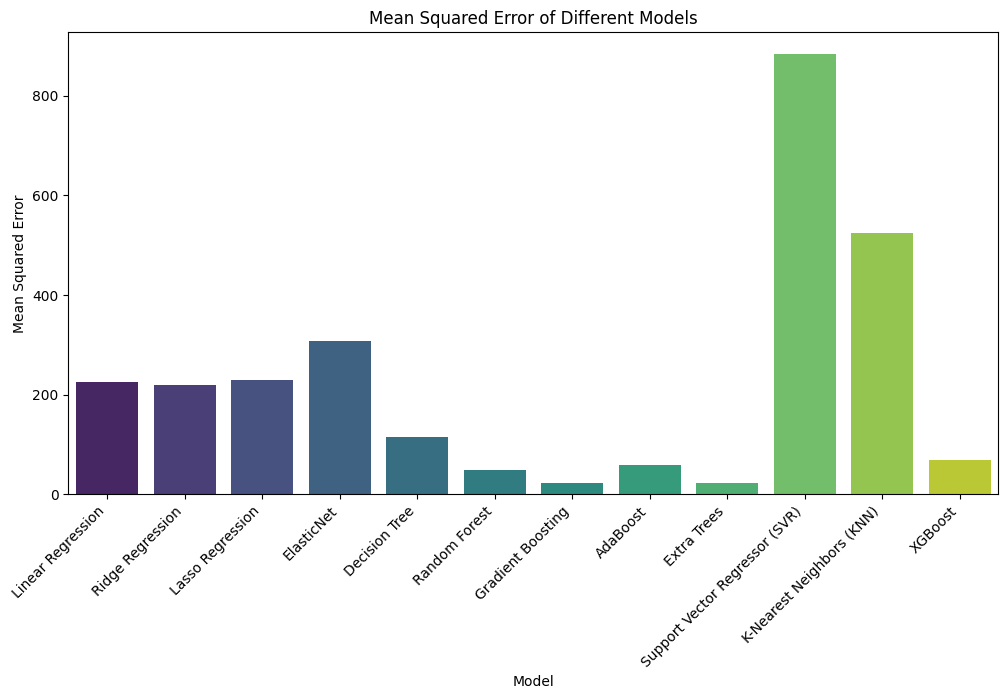

<ipython-input-20-36dacaf1a400>:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=results_df.index, y='R2', data=results_df, palette='coolwarm')


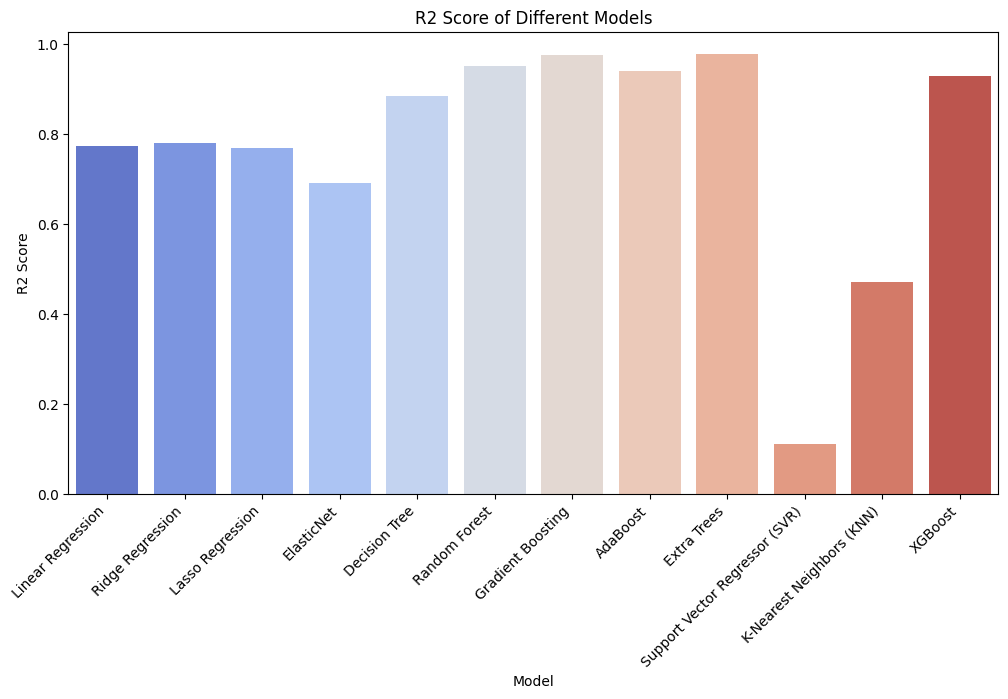

Model Evaluation Results:
                                       MSE        R2
Extra Trees                      21.910854  0.977984
Gradient Boosting                23.353756  0.976535
Random Forest                    48.275822  0.951494
AdaBoost                         59.424638  0.940292
XGBoost                          69.616494  0.930051
Decision Tree                   114.837838  0.884614
Ridge Regression                219.262278  0.779690
Linear Regression               225.004254  0.773921
Lasso Regression                229.613667  0.769290
ElasticNet                      307.709555  0.690821
K-Nearest Neighbors (KNN)       525.205405  0.472286
Support Vector Regressor (SVR)  883.229064  0.112552


In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you have already run the previous code block and have the 'results_df' DataFrame

# Convert results to DataFrame (if not already done)
results_df = pd.DataFrame(results).T

# Plot the MSE for each model
plt.figure(figsize=(12, 6))
sns.barplot(x=results_df.index, y='MSE', data=results_df, palette='viridis')
plt.title('Mean Squared Error of Different Models')
plt.xlabel('Model')
plt.ylabel('Mean Squared Error')
plt.xticks(rotation=45, ha='right')
plt.show()

# Plot the R2 Score for each model
plt.figure(figsize=(12, 6))
sns.barplot(x=results_df.index, y='R2', data=results_df, palette='coolwarm')
plt.title('R2 Score of Different Models')
plt.xlabel('Model')
plt.ylabel('R2 Score')
plt.xticks(rotation=45, ha='right')
plt.show()

# Display the results table
print("Model Evaluation Results:")
print(results_df.sort_values(by="R2", ascending=False))


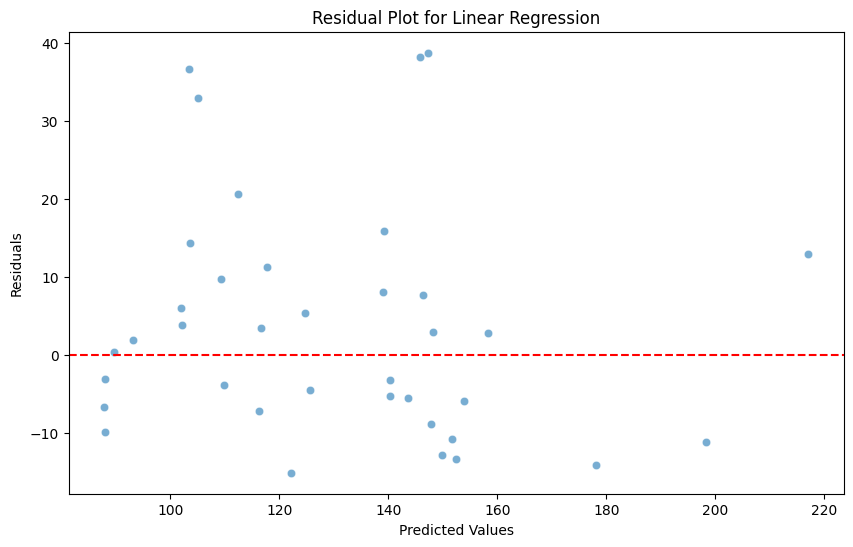

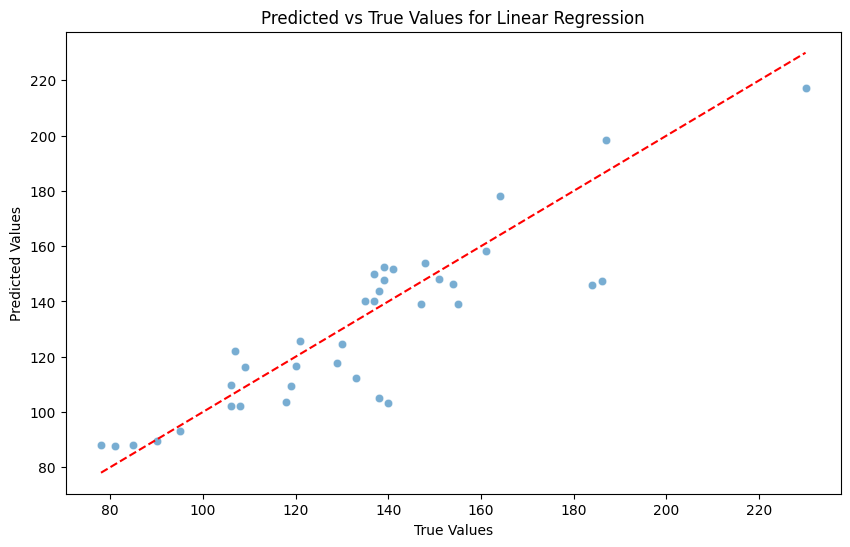

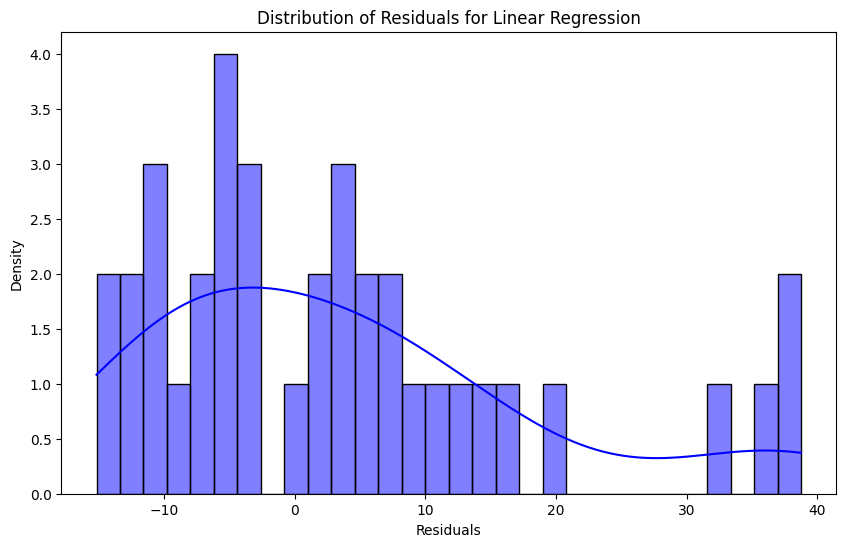

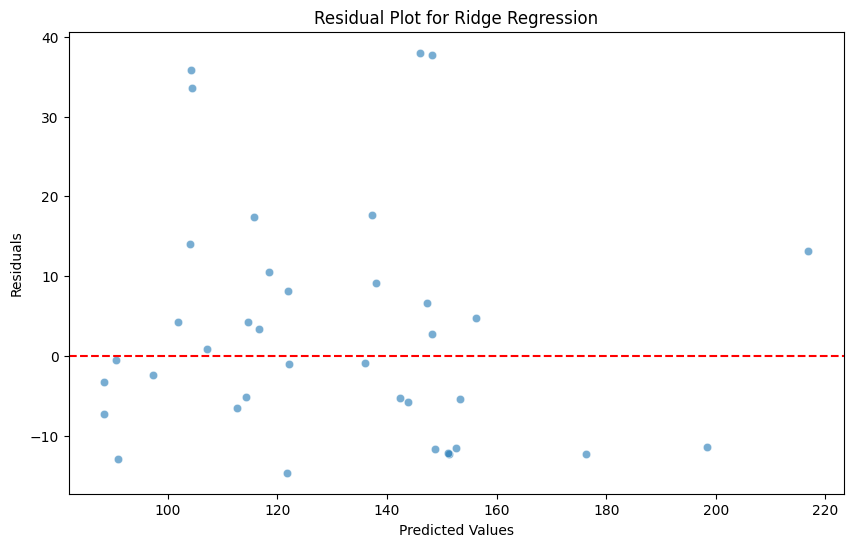

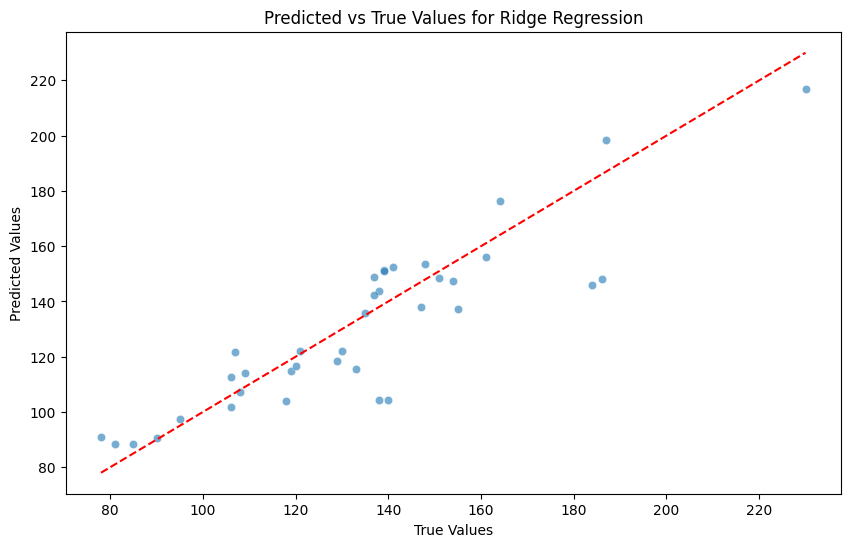

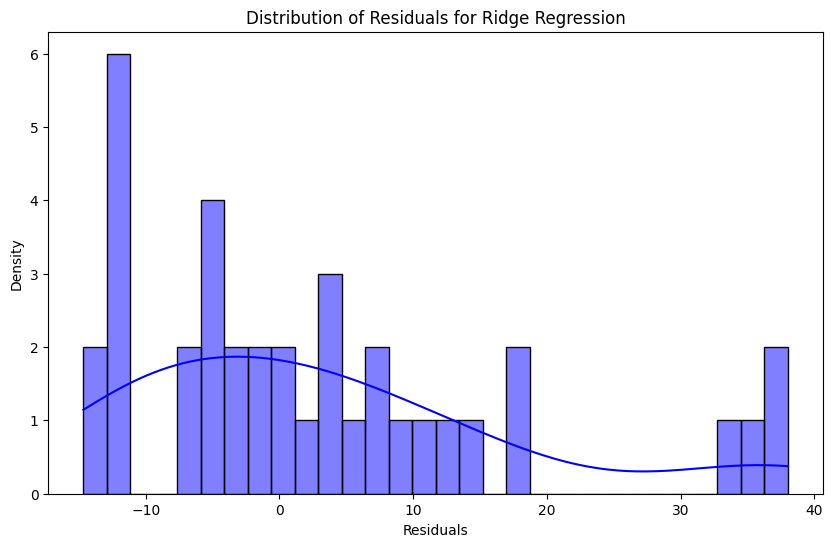

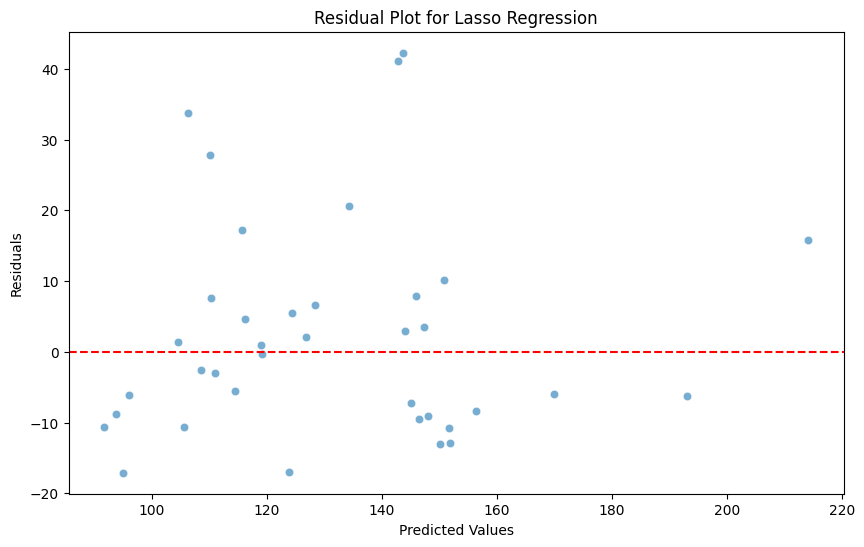

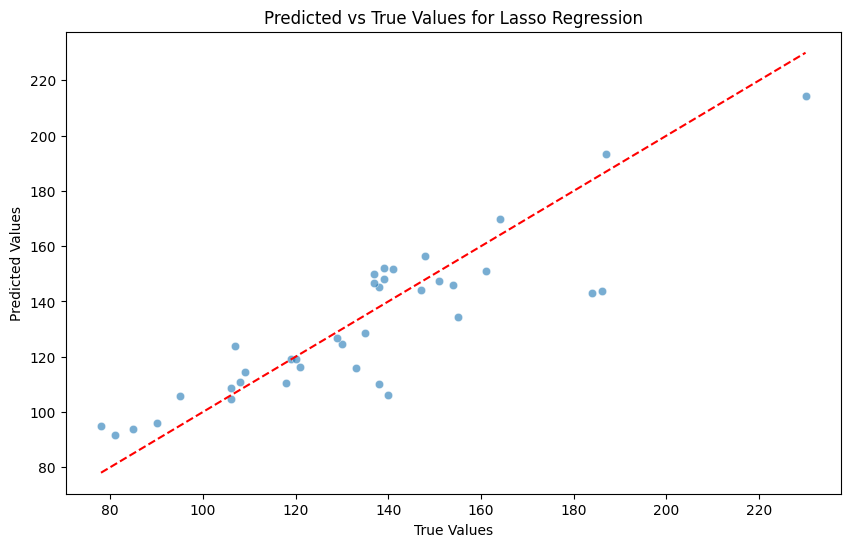

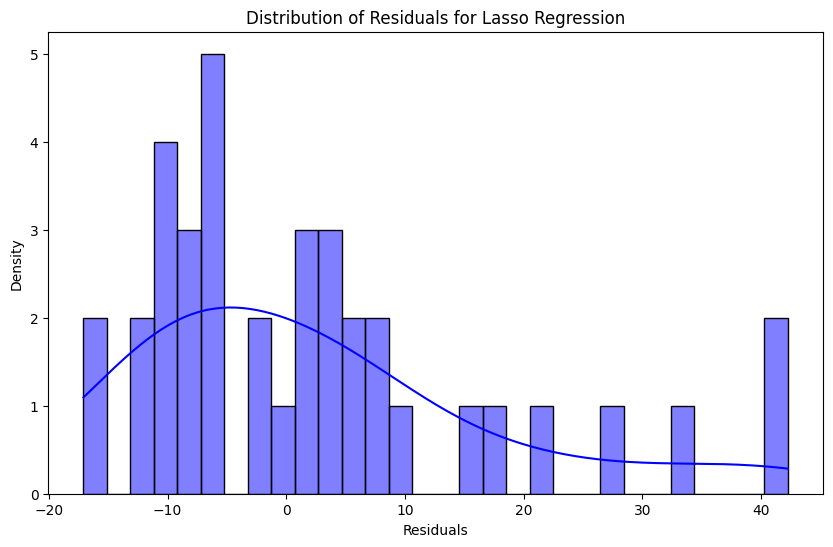

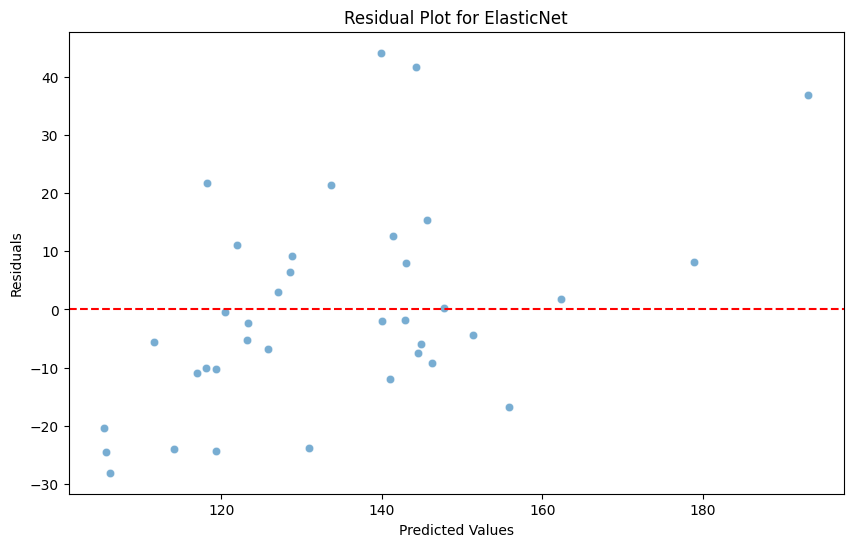

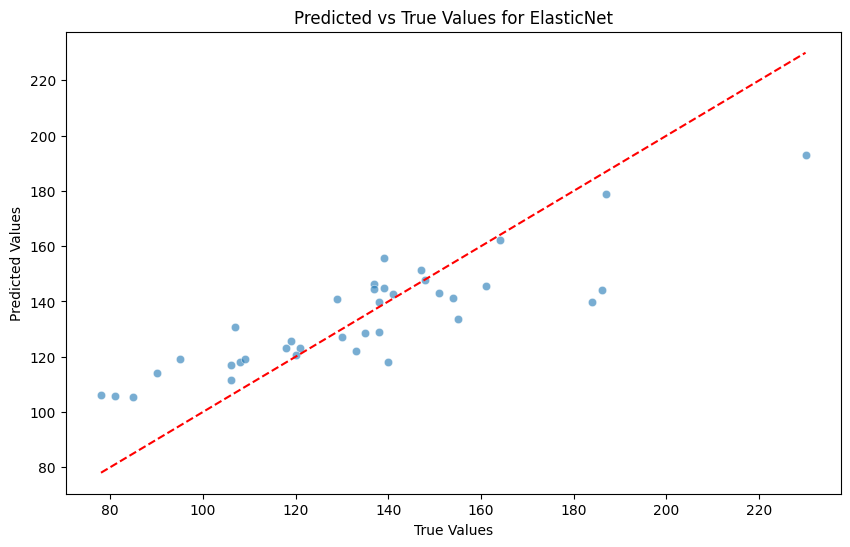

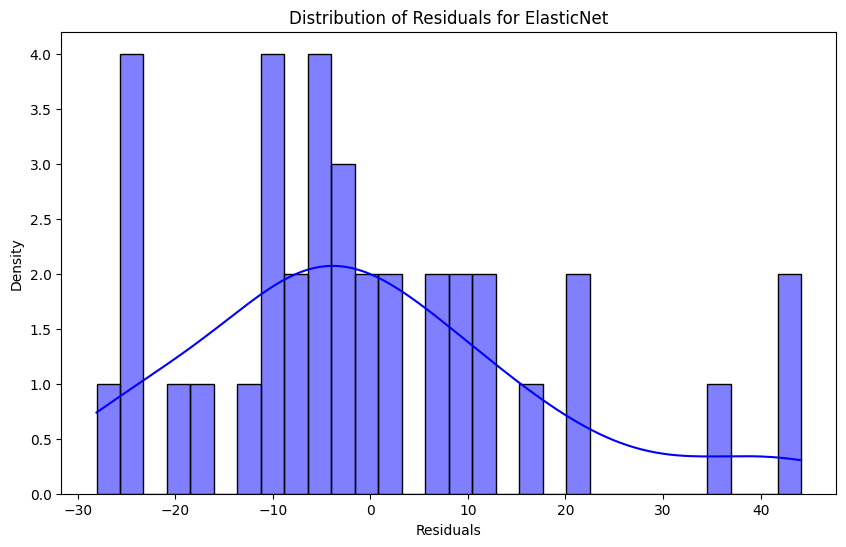

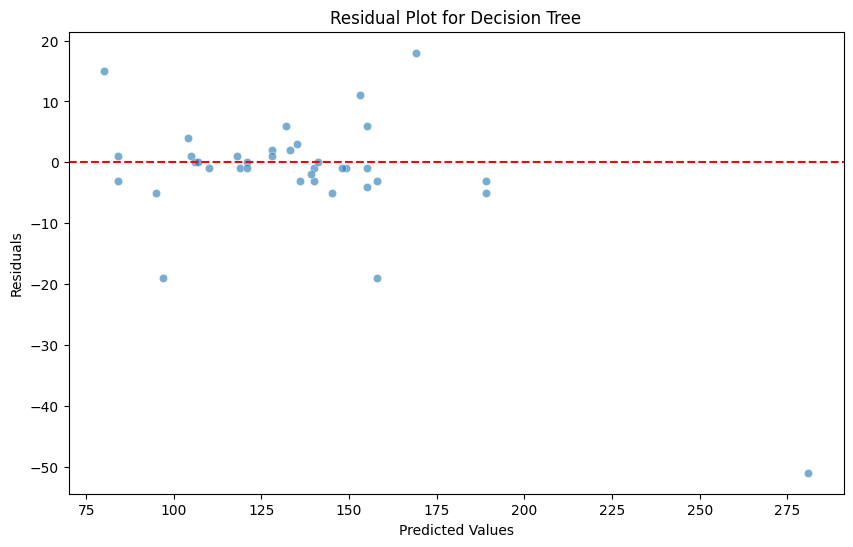

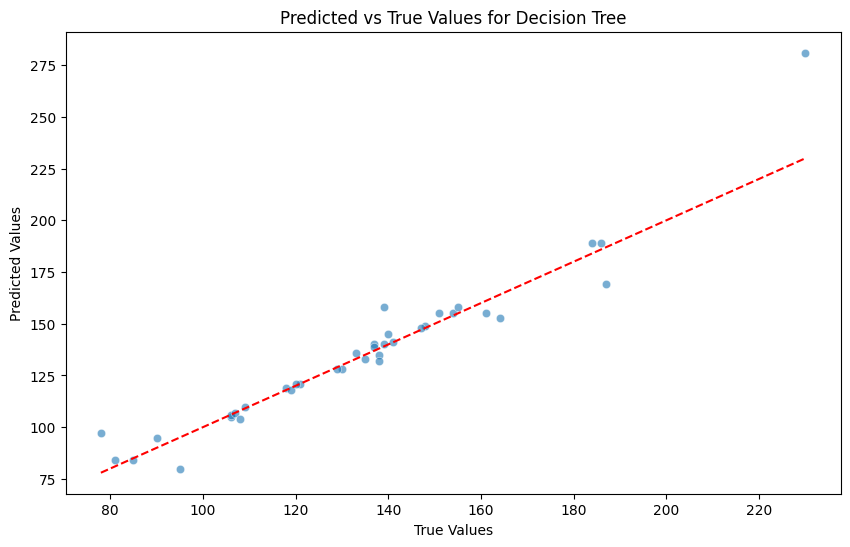

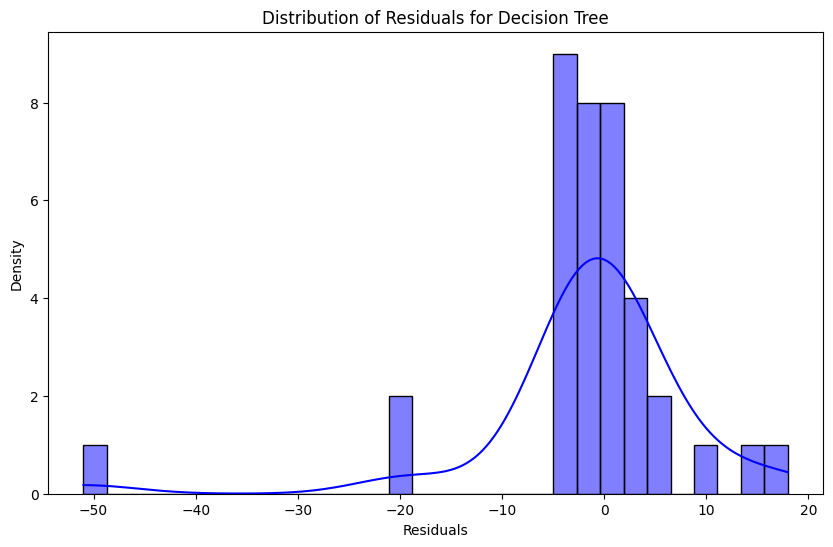

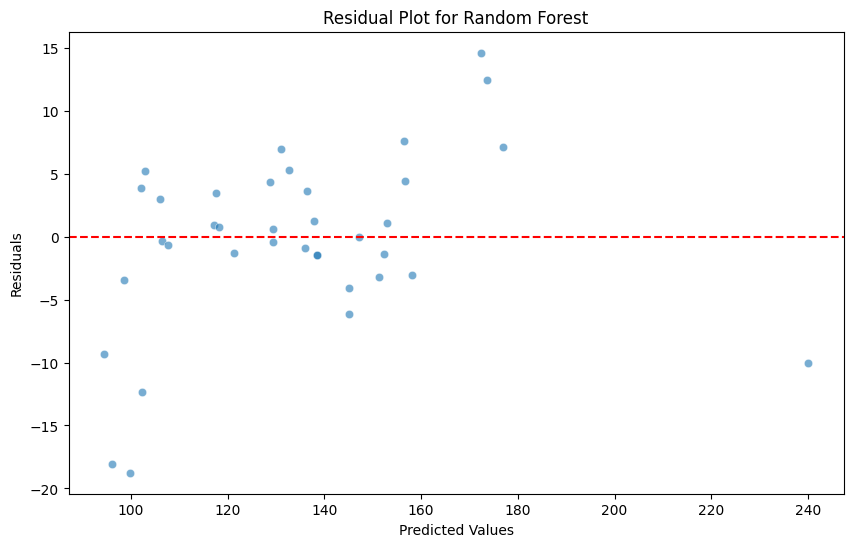

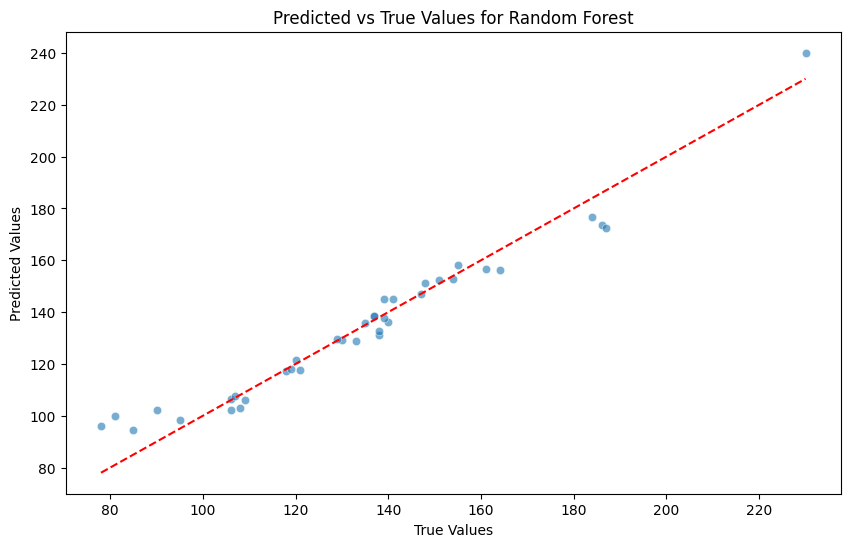

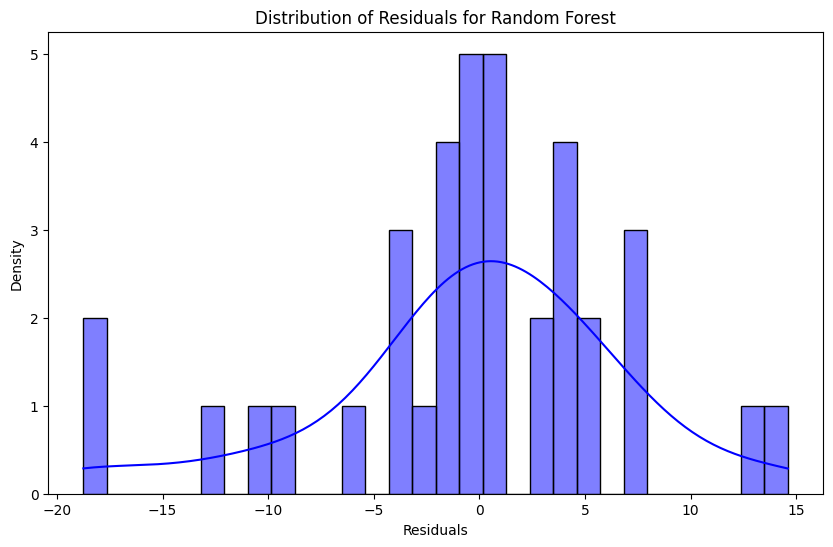

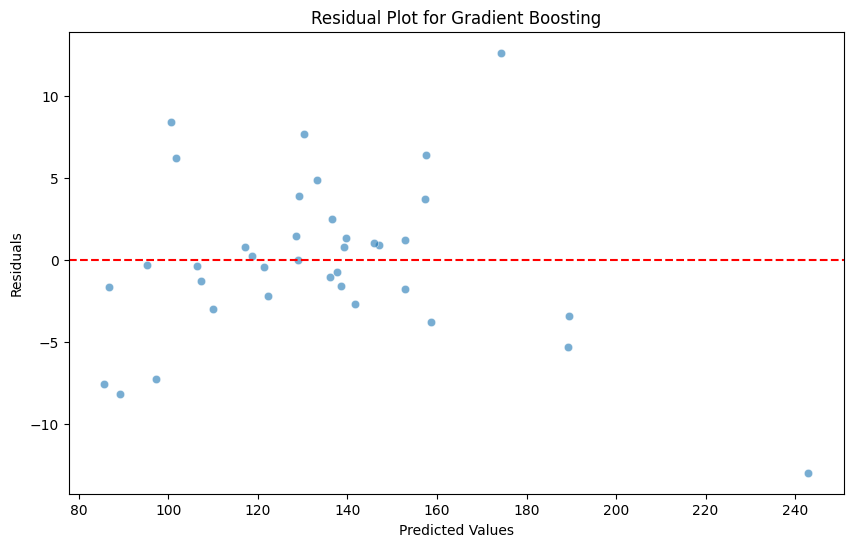

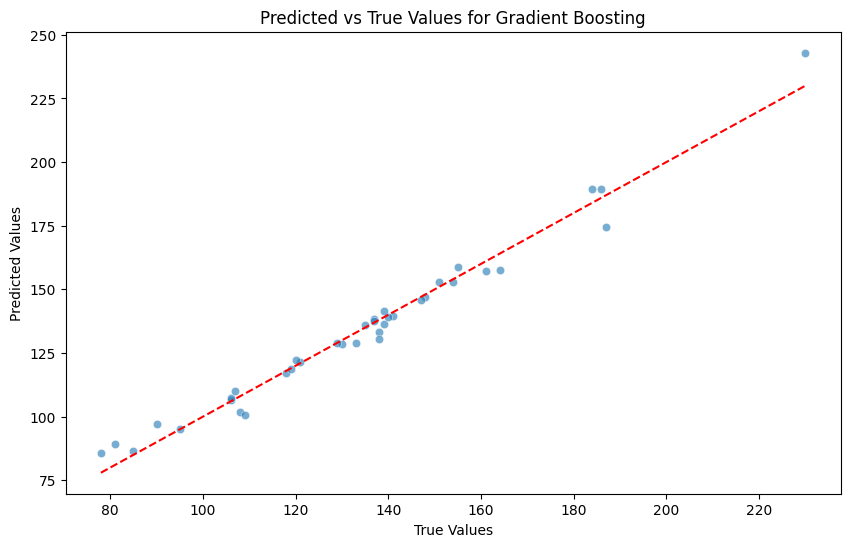

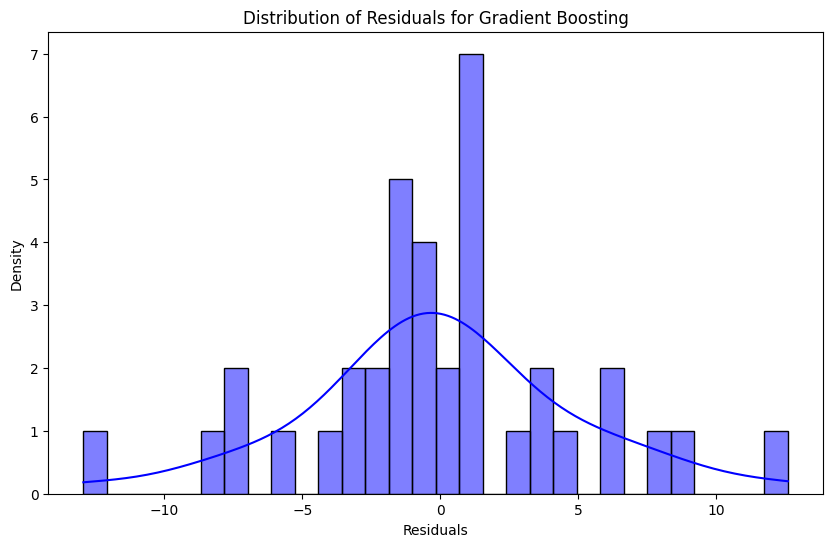

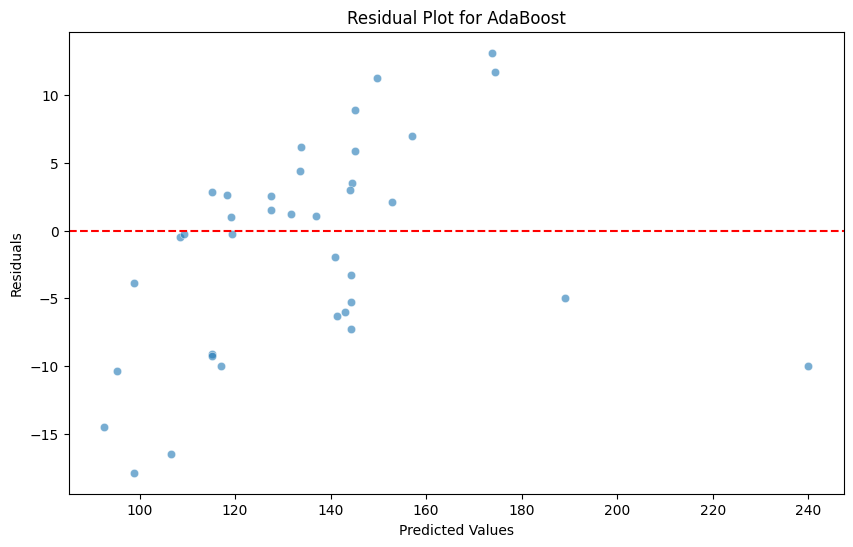

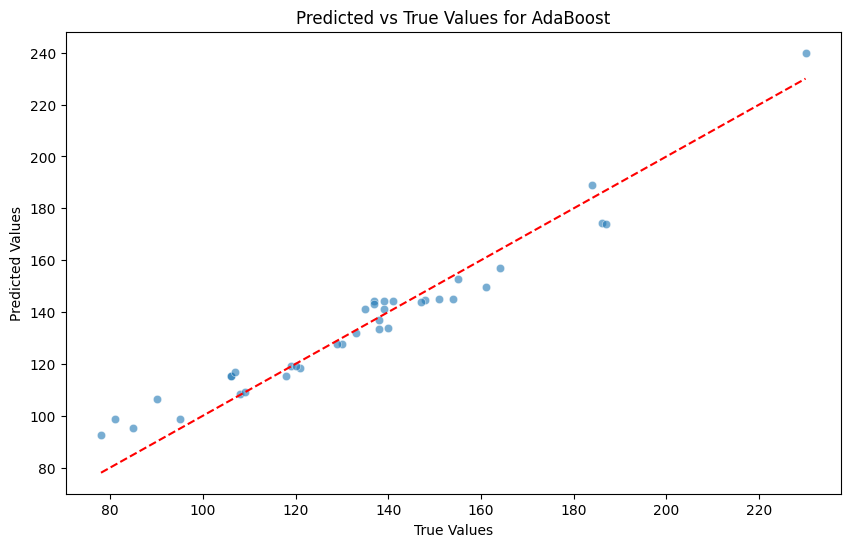

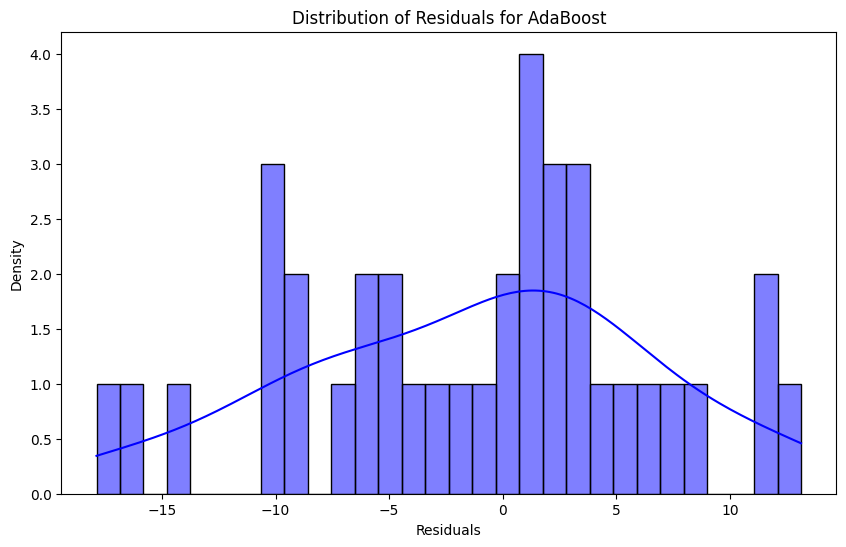

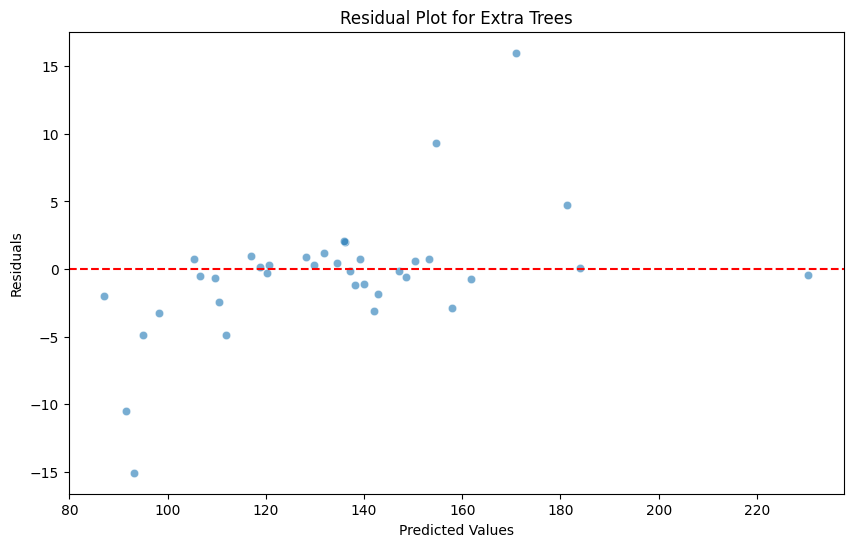

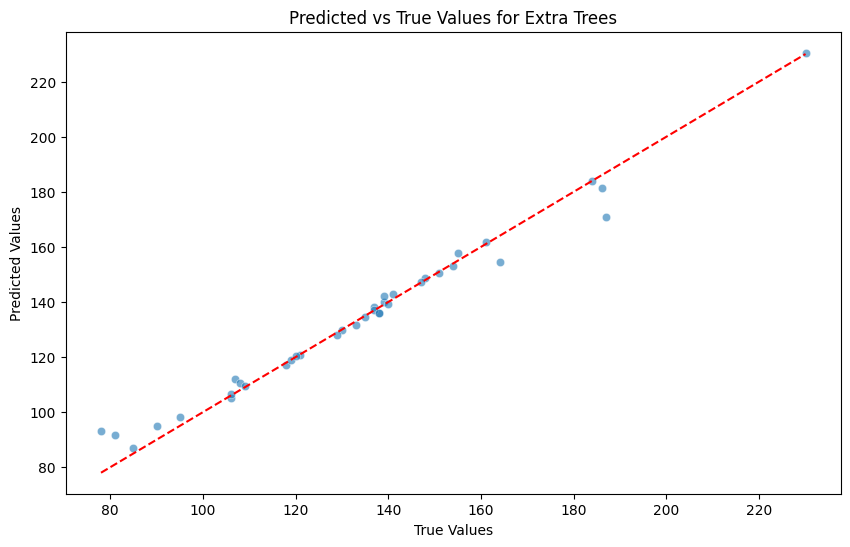

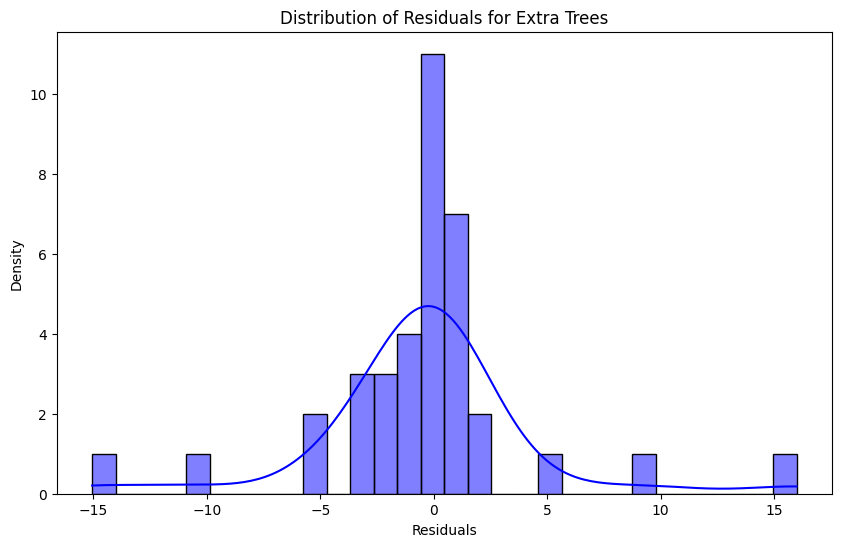

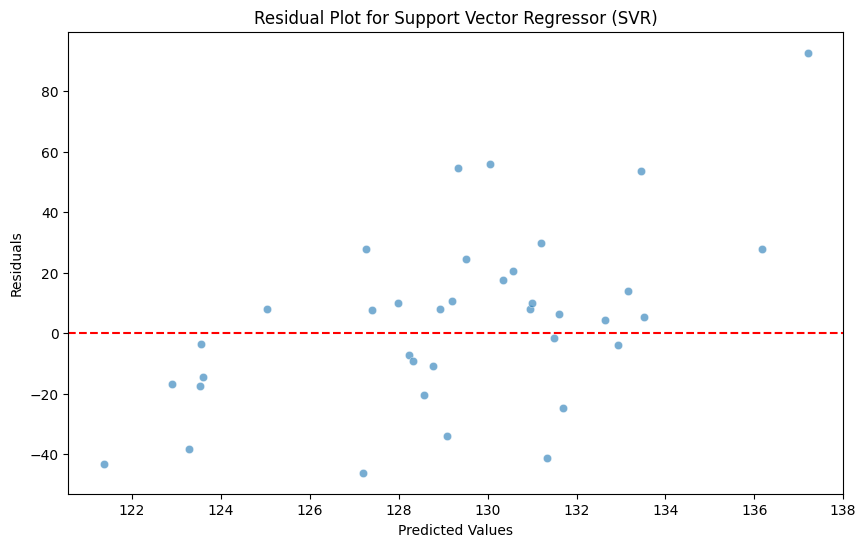

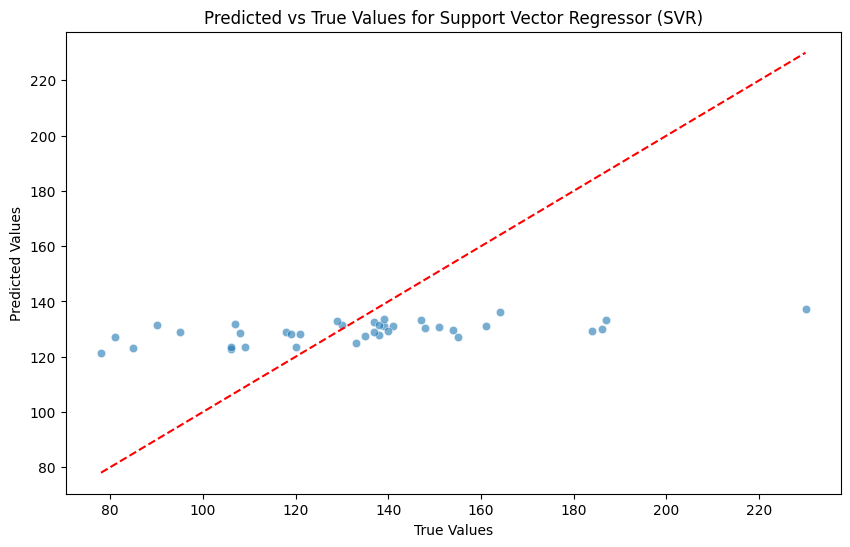

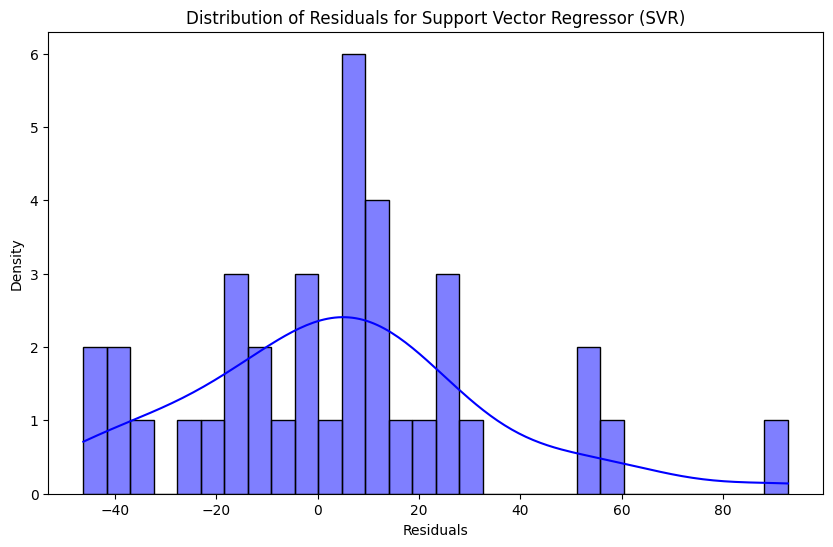

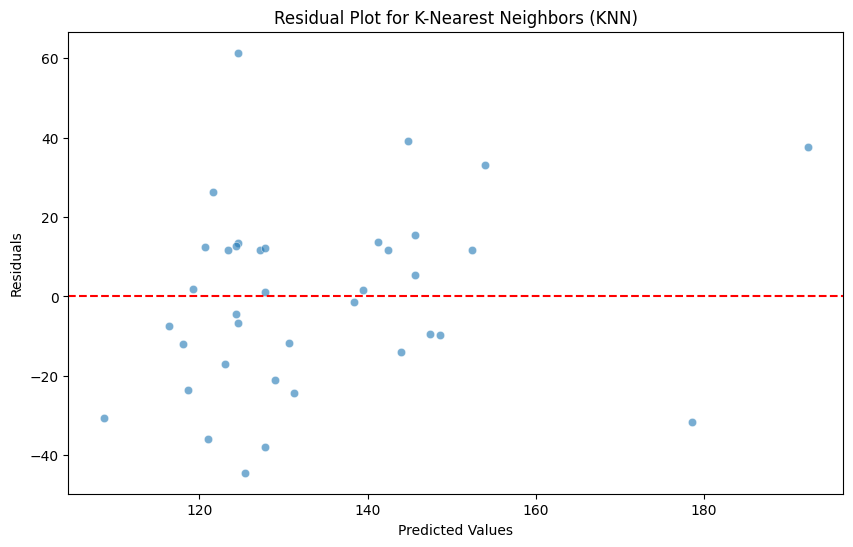

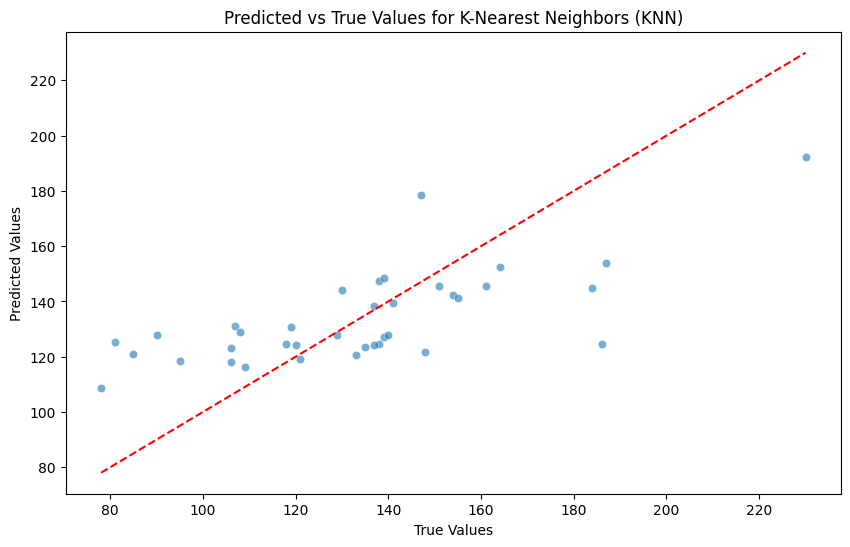

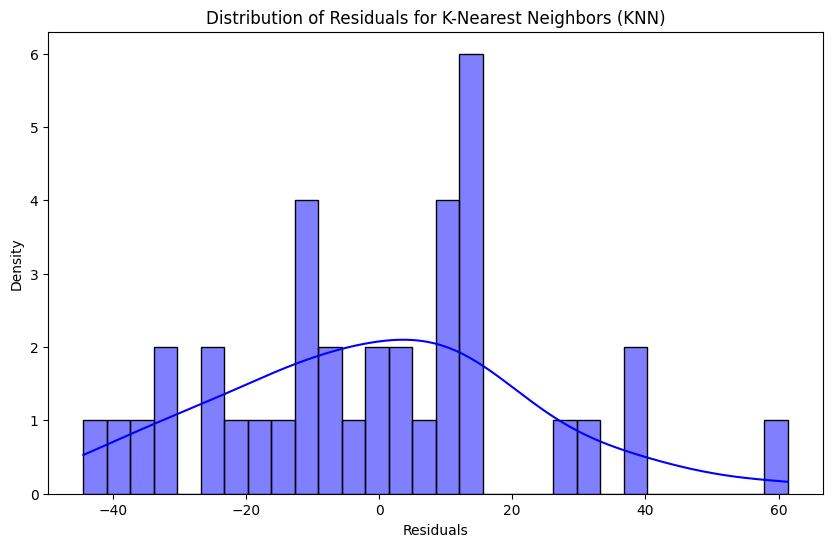

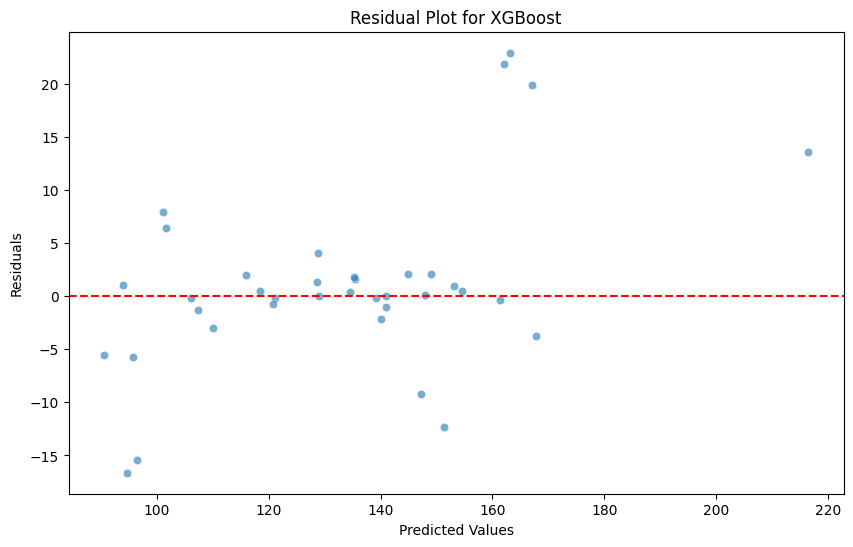

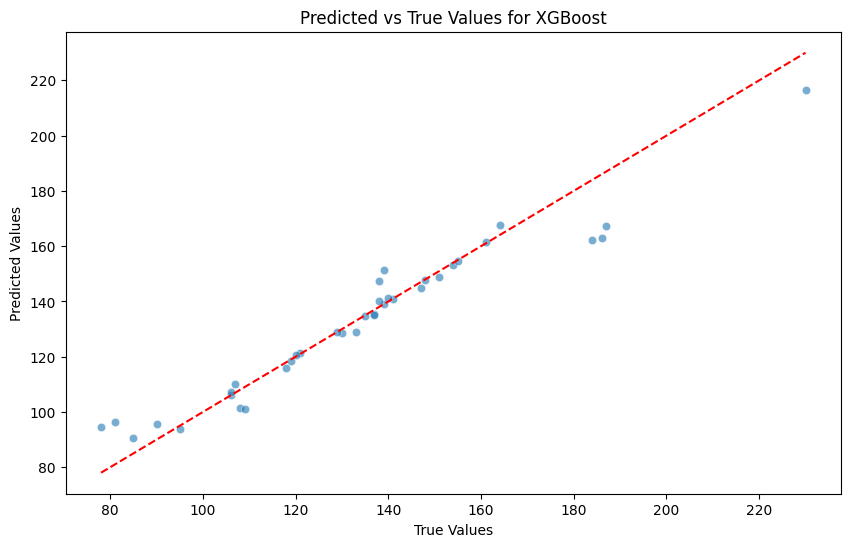

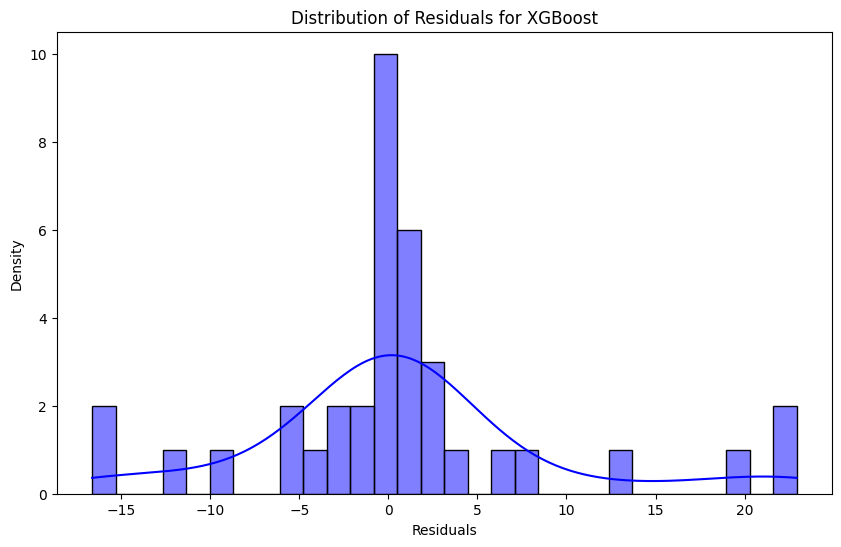

In [21]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Loop through all models and generate plots
for name, model in models.items():
    # Predict on the test set
    y_pred = model.predict(X_test_scaled)

    # Calculate residuals
    residuals = y_test - y_pred

    # 1. Residual Plot
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=y_pred, y=residuals, alpha=0.6)
    plt.axhline(y=0, color='r', linestyle='--')
    plt.xlabel('Predicted Values')
    plt.ylabel('Residuals')
    plt.title(f'Residual Plot for {name}')
    plt.show()

    # 2. Prediction vs. True Value Plot
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=y_test, y=y_pred, alpha=0.6)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
    plt.xlabel('True Values')
    plt.ylabel('Predicted Values')
    plt.title(f'Predicted vs True Values for {name}')
    plt.show()

    # 3. Distribution of Residuals
    plt.figure(figsize=(10, 6))
    sns.histplot(residuals, kde=True, color="blue", bins=30)
    plt.title(f'Distribution of Residuals for {name}')
    plt.xlabel('Residuals')
    plt.ylabel('Density')
    plt.show()
